# RESULTS ANALYSIS

### Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Load Data


In [4]:
df_t5 = pd.read_csv('t5_without_finetuning.csv')
df_t5_ft = pd.read_csv('t5_finetuned.csv')
df_gemma = pd.read_csv('gemma_without_finetuning.csv')
df_gemma_ft = pd.read_csv('gemma_finetuned.csv')

In [5]:
df_t5['Modelo'] = 'T5'
df_t5['Fine-tuning'] = 'No'

df_t5_ft['Modelo'] = 'T5'
df_t5_ft['Fine-tuning'] = 'Sí'

df_gemma['Modelo'] = 'Gemma'
df_gemma['Fine-tuning'] = 'No'

df_gemma_ft['Modelo'] = 'Gemma'
df_gemma_ft['Fine-tuning'] = 'Sí'

In [6]:
# Unimos todos los resultados en un solo DataFrame
df_bleu_all = pd.concat([
    df_t5,
    df_t5_ft,
    df_gemma,
    df_gemma_ft
], ignore_index=True)

In [7]:
df_bleu_all = df_bleu_all.rename(columns={'bleu_score': 'BLEU'})

df_bleu_all = df_bleu_all[['Modelo', 'Fine-tuning', 'BLEU', 'sql_level', 'question_level']]

orden_modelo = ['T5', 'Gemma']
orden_ft = ['No', 'Sí']

# Ordenamos los valores por modelo y fine-tuning
df_bleu_all['Modelo'] = pd.Categorical(df_bleu_all['Modelo'], categories=orden_modelo, ordered=True)
df_bleu_all['Fine-tuning'] = pd.Categorical(df_bleu_all['Fine-tuning'], categories=orden_ft, ordered=True)

df_bleu_all = df_bleu_all.sort_values(by=['Modelo', 'Fine-tuning']).reset_index(drop=True)


In [8]:
df_bleu_all.head()

,Modelo,Fine-tuning,BLEU,sql_level,question_level
0,T5,No,0.678996,3. Consulta con agregación simple,1. Consulta directa y corta
1,T5,No,0.702856,3. Consulta con agregación simple,1. Consulta directa y corta
2,T5,No,0.418483,1. Consulta simple,2. Consulta con cuantificadores
3,T5,No,0.485319,1. Consulta simple,2. Consulta con cuantificadores
4,T5,No,0.568129,3. Consulta con agregación simple,2. Consulta con cuantificadores


In [9]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="white", context="notebook", font_scale=1.1)

# Definimos una paleta de colores pastel personalizada
pastel_palette = ["#7ea9e1", "#b0b0b0"]

### Rendimiento medio BLEU por modelo

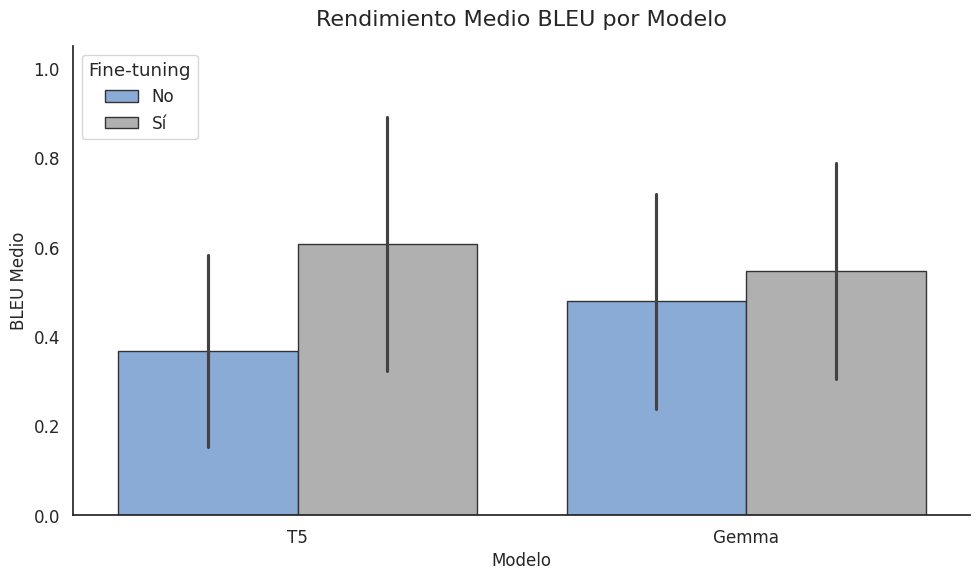

In [10]:
# Creamos la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras del BLEU medio por modelo y fine-tuning
sns.barplot(
    data=df_bleu_all,
    x="Modelo",
    y="BLEU",
    hue="Fine-tuning",
    errorbar="sd",
    palette=pastel_palette,
    ax=ax,
    edgecolor="0.2"
)

# Personalizamos título y ejes
ax.set_title("Rendimiento Medio BLEU por Modelo", fontsize=16, pad=15)
ax.set_ylabel("BLEU Medio", fontsize=12)
ax.set_xlabel("Modelo", fontsize=12)
ax.set_ylim(0, 1.05)

# Mejoramos la leyenda
ax.legend(title="Fine-tuning", loc="upper left", frameon=True)

# Quitamos los bordes superiores y derechos
sns.despine(ax=ax)

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()


### Distribución de puntuaciones BLEU por modelo


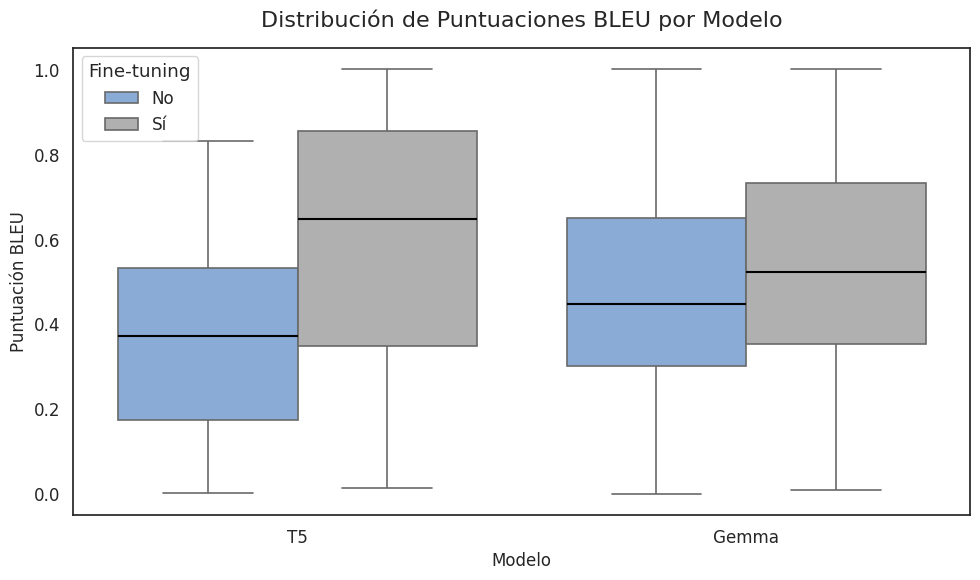

In [11]:
# Creamos la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot de las puntuaciones BLEU por modelo y fine-tuning
sns.boxplot(
    data=df_bleu_all,
    x="Modelo",
    y="BLEU",
    hue="Fine-tuning",
    palette=pastel_palette,
    ax=ax,
    linewidth=1.2,
    medianprops={'color': 'black', 'linewidth': 1.5},
    flierprops={'marker': 'o', 'markerfacecolor': 'black', 'alpha': 0.5}
)

# Personalizamos título y ejes
ax.set_title("Distribución de Puntuaciones BLEU por Modelo", fontsize=16, pad=15)
ax.set_ylabel("Puntuación BLEU", fontsize=12)
ax.set_xlabel("Modelo", fontsize=12)
ax.set_ylim(-0.05, 1.05)

# Leyenda con título
ax.legend(title="Fine-tuning", loc="upper left")

# Ajustamos el diseño
plt.tight_layout()

# Mostramos el gráfico
plt.show()


### Comparación BLEU tipo SQL

<ipython-input-13-759253763>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)


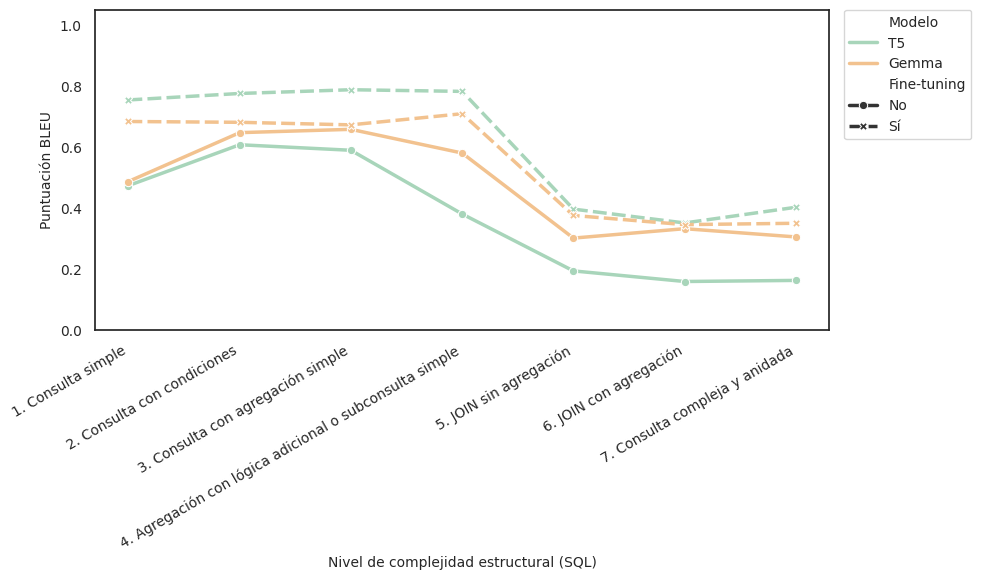

In [13]:
# Paleta pastel para T5 y Gemma
pastel_palette = ["#A8D5BA", "#f2c28f"]

orden_sql = [
    "1. Consulta simple",
    "2. Consulta con condiciones",
    "3. Consulta con agregación simple",
    "4. Agregación con lógica adicional o subconsulta simple",
    "5. JOIN sin agregación",
    "6. JOIN con agregación",
    "7. Consulta compleja y anidada"
]


# Aseguramos que sql_level sea categórica ordenada
cat_dtype = CategoricalDtype(categories=orden_sql, ordered=True)
df_bleu_all["sql_level"] = df_bleu_all["sql_level"].astype(cat_dtype)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Configuramos el estilo del gráfico
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

# Gráfico de líneas: BLEU medio según nivel SQL
sns.lineplot(
    data=df_bleu_all,
    x="sql_level",
    y="BLEU",
    hue="Modelo",
    style="Fine-tuning",
    markers=True,
    dashes=True,
    estimator="mean",
    errorbar=None,
    palette=pastel_palette,
    ax=ax,
    linewidth=2.5
)

# Personalización de ejes y leyenda
ax.set_ylabel("Puntuación BLEU", fontsize=10)
ax.set_xlabel("Nivel de complejidad estructural (SQL)", fontsize=10)
ax.set_ylim(0, 1.05)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Leyenda fuera del gráfico
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    fontsize=10
)

# Ajustamos el diseño
plt.tight_layout()
plt.show()


### Comparación BLEU tipo pregunta

<ipython-input-15-513071735>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)


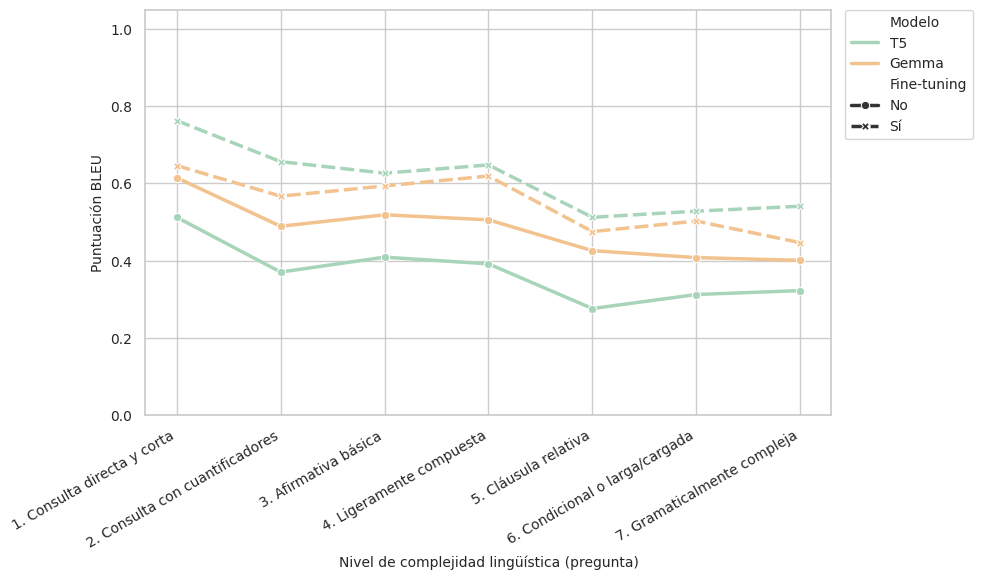

In [15]:
orden_pregunta = [
    "1. Consulta directa y corta",
    "2. Consulta con cuantificadores",
    "3. Afirmativa básica",
    "4. Ligeramente compuesta",
    "5. Cláusula relativa",
    "6. Condicional o larga/cargada",
    "7. Gramaticalmente compleja"
]

# Convertimos question_level a categoría ordenada
cat_dtype = CategoricalDtype(categories=orden_pregunta, ordered=True)
df_bleu_all["question_level"] = df_bleu_all["question_level"].astype(cat_dtype)

# Paleta pastel para los modelos
pastel_palette = ["#A8D5BA", "#f2c28f"]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Estilo del gráfico
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

# Gráfico de líneas: BLEU medio según complejidad lingüística
sns.lineplot(
    data=df_bleu_all,
    x="question_level",
    y="BLEU",
    hue="Modelo",
    style="Fine-tuning",
    markers=True,
    dashes=True,
    estimator="mean",
    errorbar=None,
    palette=pastel_palette,
    ax=ax,
    linewidth=2.5
)

# Personalización de ejes
ax.set_ylabel("Puntuación BLEU", fontsize=10)
ax.set_xlabel("Nivel de complejidad lingüística (pregunta)", fontsize=10)
ax.set_ylim(0, 1.05)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Leyenda fuera del gráfico
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    fontsize=10
)

# Ajustamos diseño final
plt.tight_layout()
plt.show()


### Comparación SQL y Lenguaje Natural

<ipython-input-17-3197492077>:44: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_bleu_subset = df_subset.pivot_table(
<ipython-input-17-3197492077>:44: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_bleu_subset = df_subset.pivot_table(
<ipython-input-17-3197492077>:44: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_bleu_subset = df_subset.pivot_table(
<ipython-input-17-3197492077>:44: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a fu

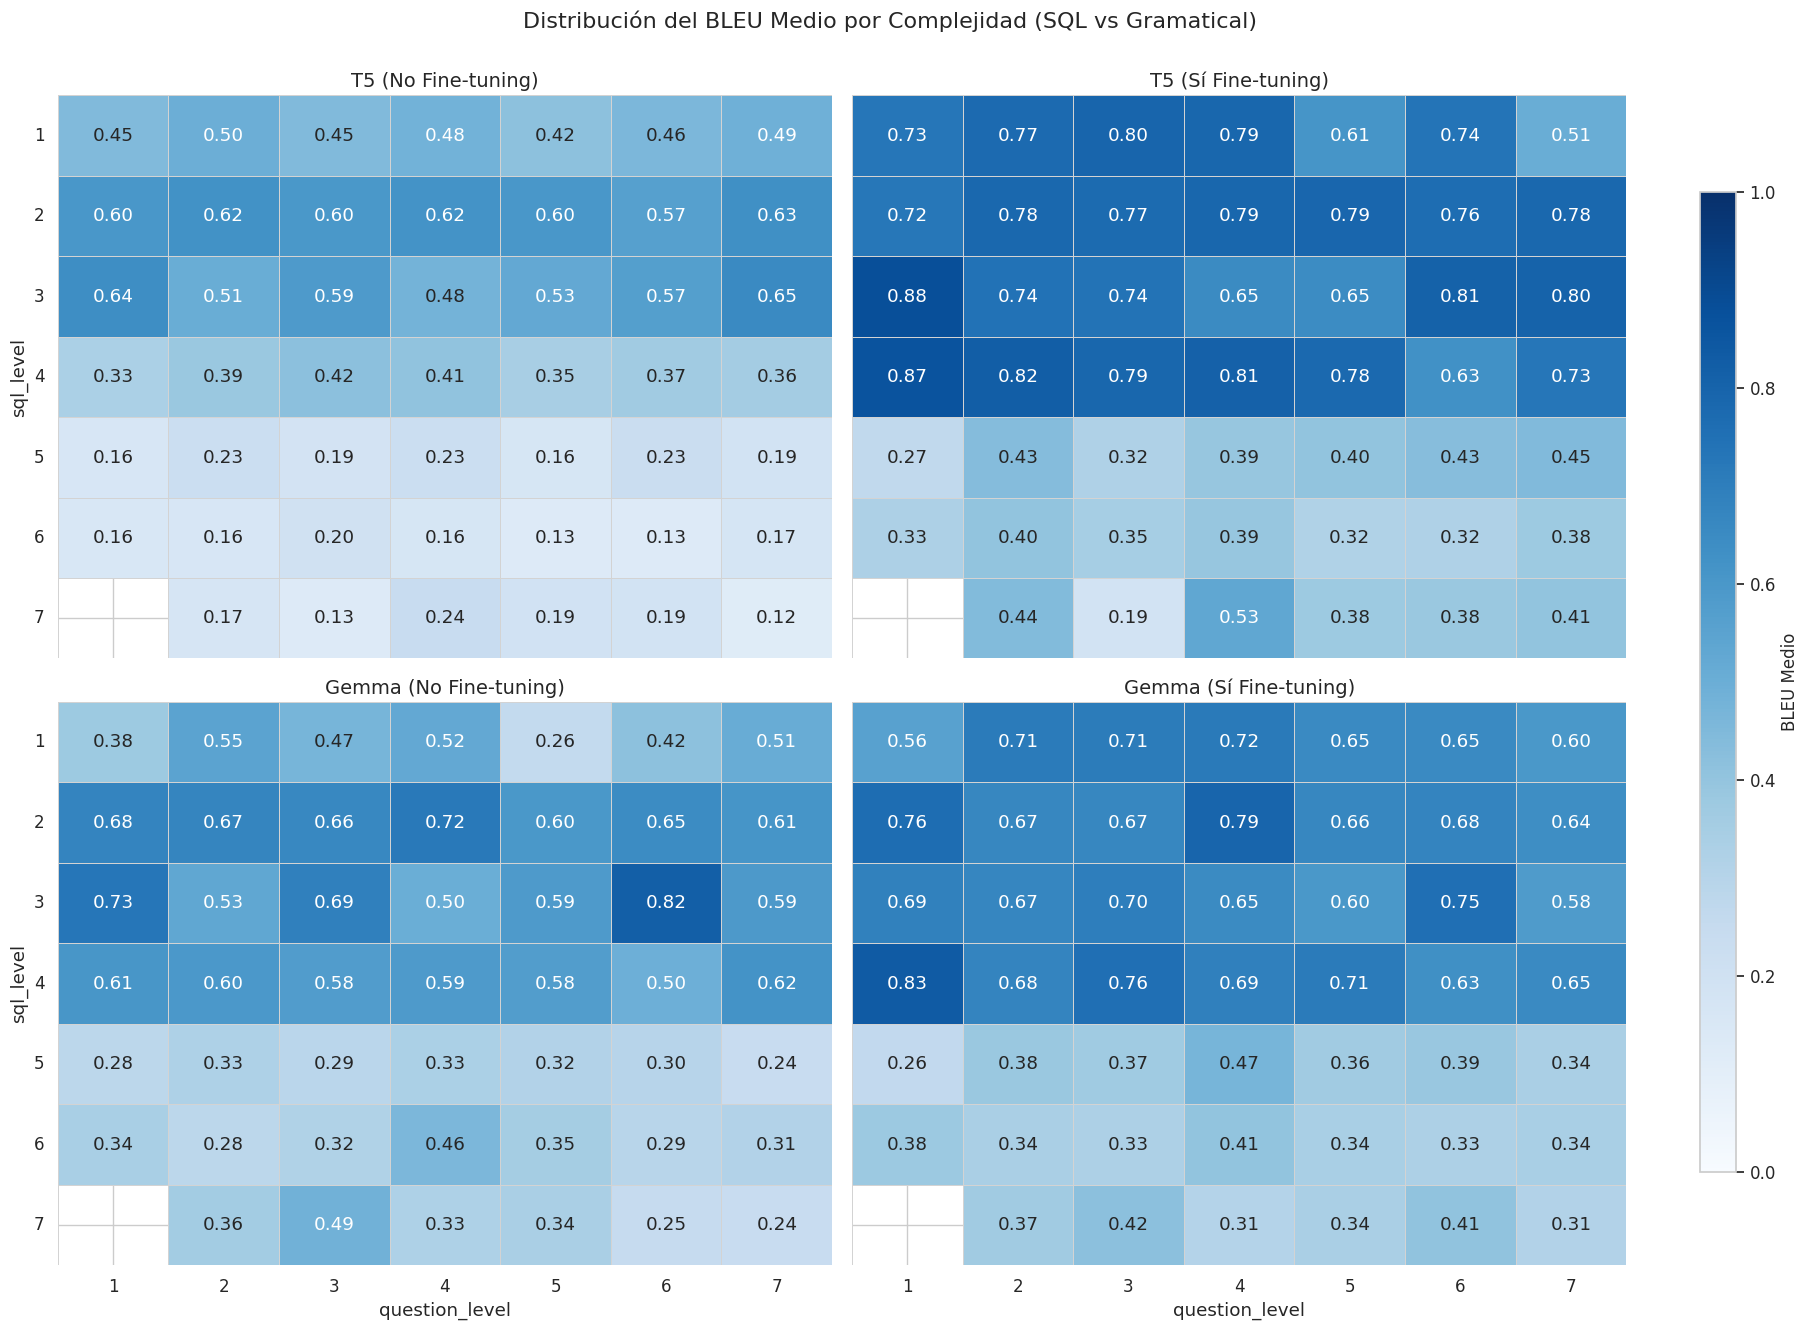

In [17]:
# Configuración del estilo de los gráficos
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

# Definimos el orden para SQL y preguntas
orden_sql = [
    "1. Consulta simple",
    "2. Consulta con condiciones",
    "3. Consulta con agregación simple",
    "4. Agregación con lógica adicional o subconsulta simple",
    "5. JOIN sin agregación",
    "6. JOIN con agregación",
    "7. Consulta compleja y anidada"
]

orden_pregunta = [
    "1. Consulta directa y corta",
    "2. Consulta con cuantificadores",
    "3. Afirmativa básica",
    "4. Ligeramente compuesta",
    "5. Cláusula relativa",
    "6. Condicional o larga/cargada",
    "7. Gramaticalmente compleja"
]

# Etiquetas abreviadas para los ejes
etiquetas_sql_cortas = [nivel.split('.')[0] for nivel in orden_sql]
etiquetas_pregunta_cortas = [nivel.split('.')[0] for nivel in orden_pregunta]

# Creamos figura y subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)
axes = axes.flatten()

# Paleta y normalización comunes para todos los heatmaps
cmap = "Blues"
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Recorremos cada combinación de modelo y fine-tuning
for i, (modelo, ft) in enumerate([('T5', 'No'), ('T5', 'Sí'), ('Gemma', 'No'), ('Gemma', 'Sí')]):
    df_subset = df_bleu_all[(df_bleu_all['Modelo'] == modelo) & (df_bleu_all['Fine-tuning'] == ft)]

    # BLEU medio por nivel SQL y lingüístico
    tabla_bleu_subset = df_subset.pivot_table(
        index="sql_level",
        columns="question_level",
        values="BLEU",
        aggfunc="mean"
    ).reindex(index=orden_sql, columns=orden_pregunta)

    # Dibujar el heatmap
    sns.heatmap(
        tabla_bleu_subset,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=False,
        ax=axes[i],
        vmin=0,
        vmax=1,
        linewidths=.5,
        linecolor='lightgray'
    )

    # Título por subplot
    axes[i].set_title(f'{modelo} ({ft} Fine-tuning)', fontsize=14)

    # Etiquetas abreviadas
    axes[i].set_xticklabels(etiquetas_pregunta_cortas, rotation=0)
    axes[i].set_yticklabels(etiquetas_sql_cortas, rotation=0)

    # Limpiar ejes si no se necesitan
    if i % 2 != 0:
        axes[i].set_ylabel('')
    if i < 2:
        axes[i].set_xlabel('')

# Añadir colorbar general
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('BLEU Medio', fontsize=12)

# Ajustes finales y título general
plt.tight_layout(rect=[0, 0.03, 0.92, 0.95])
fig.suptitle('Distribución del BLEU Medio por Complejidad (SQL vs Gramatical)', fontsize=16, y=0.98)

plt.show()


### Training y Validation Loss

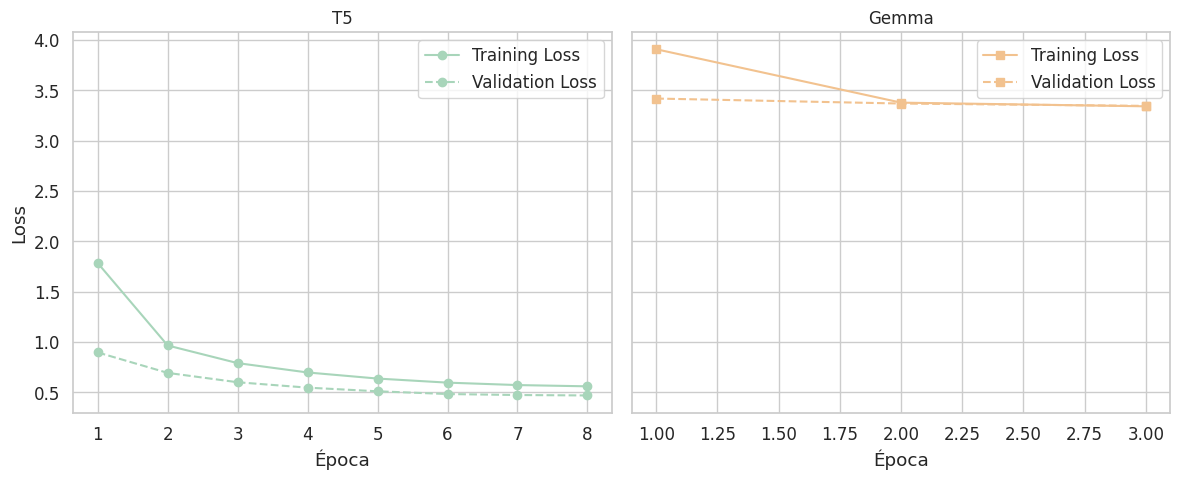

In [19]:
# Datos de pérdida por época para T5
epochs_t5 = list(range(1, 9))
train_loss_t5 = [1.7838, 0.9652, 0.79, 0.6971, 0.6366, 0.5961, 0.5720, 0.5594]
val_loss_t5 = [0.8961, 0.6929, 0.5999, 0.5464, 0.5101, 0.4829, 0.4730, 0.4689]

# Datos de pérdida por época para Gemma
epochs_gemma = [1, 2, 3]
train_loss_gemma = [3.9084, 3.3779, 3.3413]
val_loss_gemma = [3.4186, 3.3690, 3.3457]

# Crear figura con dos gráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Gráfico de pérdida para T5
axes[0].plot(epochs_t5, train_loss_t5, marker='o', label='Training Loss', color='#A8D5BA')
axes[0].plot(epochs_t5, val_loss_t5, marker='o', linestyle='--', label='Validation Loss', color='#A8D5BA')
axes[0].set_title('T5', fontsize=12)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Gráfico de pérdida para Gemma
axes[1].plot(epochs_gemma, train_loss_gemma, marker='s', label='Training Loss', color='#f2c28f')
axes[1].plot(epochs_gemma, val_loss_gemma, marker='s', linestyle='--', label='Validation Loss', color='#f2c28f')
axes[1].set_title('Gemma', fontsize=12)
axes[1].set_xlabel('Época')
axes[1].legend()
axes[1].grid(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

